# <font color='GREY'> Detecção de Doenças do Fígado</font>


## **Contexto**

Os pacientes com doença hepática têm aumentado continuamente devido ao consumo excessivo de álcool, inalação de gases nocivos, ingestão de alimentos contaminados, bem como uso de medicamentos. Este conjunto de dados foi usado para possibilitar a criação de Máquinas Preditivas com algoritmos de previsão num esforço para **reduzir a carga sobre os médicos**.

#1° Problema de Negócio 
Precisamos construir uma Máquina Preditiva que, a partir de dados históricos de pacientes, determine quais pacientes têm doença hepática e quais não têm.

# 2° Análise Exploratória dos Dados

projeto  UCI https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)

Com base em compostos químicos (bilrubina, albumina, proteína, fosfatase alcalina) presentes no corpo humano e testes como SGOT, SGPT o resultado mencionado se o paciente tem ou não problemas hepáticos.

Este conjunto de dados contém 416 registros de pacientes do fígado e 167 registros de doenças do fígado coletados no Nordeste de Andhra Pradesh, na Índia. 

A coluna "dataset" é um rótulo de classe(label/TARGET) usado para dividir grupos em pacientes com doença hepática ou não (sem doença). 

Este conjunto de dados contém 441 registros de pacientes do sexo masculino e 142 do sexo feminino.

## AD - Arquitetura dos Dados/Dicionário de Dados

* Idade do paciente
* Sexo do paciente
* Bilirrubina Total
* Bilirrubina direta
* Fosfotase Alcalina
* Alamina Aminotransferase
* Aspartato Aminotransferase
* Protiens Total
* Albumina
* Proporção de albumina e globulina
* dataset: campo usado para dividir os dados em dois conjuntos (paciente com doença hepática ou sem doença)

In [2]:
# importando os pacotes

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore") 

In [4]:
# Lendo os dados
df = pd.read_csv('/content/indian_liver_patient.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<AxesSubplot:xlabel='Dataset', ylabel='count'>

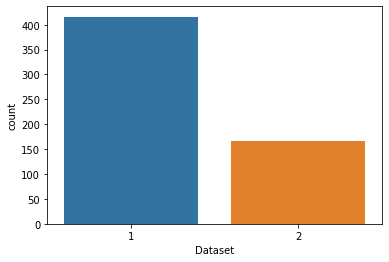

In [10]:
# olhando o nosso target
df['Dataset'].value_counts()
sns.countplot(df['Dataset'])

In [11]:
# Olhando as categoricas
df['Gender'].value_counts()


Male      441
Female    142
Name: Gender, dtype: int64

In [13]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


#3° Pré-Processamento dos Dados

In [14]:
#Removendo os dados faltantes
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    int64  
 1   Gender                      579 non-null    object 
 2   Total_Bilirubin             579 non-null    float64
 3   Direct_Bilirubin            579 non-null    float64
 4   Alkaline_Phosphotase        579 non-null    int64  
 5   Alamine_Aminotransferase    579 non-null    int64  
 6   Aspartate_Aminotransferase  579 non-null    int64  
 7   Total_Protiens              579 non-null    float64
 8   Albumin                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     579 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 54.3+ KB


In [15]:
# Transformando os dados categoricos em numericos
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)

In [16]:
# Explorando a correlações
df.corr().Dataset.sort_values(ascending=False)

Dataset                       1.000000
Albumin_and_Globulin_Ratio    0.163131
Albumin                       0.159770
Total_Protiens                0.033614
Gender                       -0.081349
Age                          -0.133164
Aspartate_Aminotransferase   -0.151834
Alamine_Aminotransferase     -0.163117
Alkaline_Phosphotase         -0.183363
Total_Bilirubin              -0.220218
Direct_Bilirubin             -0.246273
Name: Dataset, dtype: float64

<AxesSubplot:>

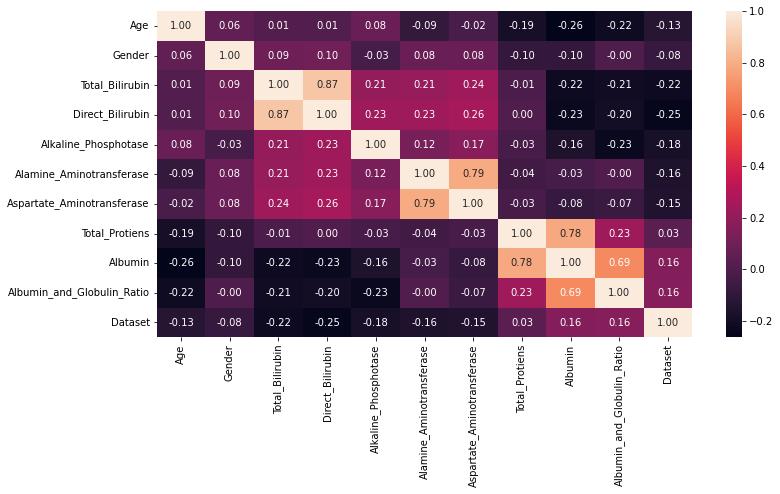

In [18]:
# Explorando as correlações visual
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [19]:
# Dividindo os dados 80% treino e 20% teste

x = df.drop('Dataset', axis=1)
y = df['Dataset']

X_treino, X_teste, Y_treino, Y_teste = train_test_split(x, y, test_size=0.2, random_state=7)

#4° Máquina Preditiva Segmentação de Clientes


### Baseline

In [21]:
# Build and train the model
model = RandomForestClassifier().fit(X_treino,Y_treino)
model 

RandomForestClassifier()

### Máquina Final

In [28]:
# Build and train the model
model = XGBClassifier(learning_rate=1, max_depth=1).fit(X_treino, Y_treino)
model

ValueError: ignored

In [22]:
# aplicando modelo de validação de dados
y_predict = model.predict(X_teste) 

In [24]:
# Comparando valor atual x predito

actual_vs_predict = pd.DataFrame({'Gabarito(valor real)': Y_teste,
                                  'Previsão_Máquina_Preditiva': y_predict})
actual_vs_predict.sample(12)

,Gabarito(valor real),Previsão_Máquina_Preditiva
492,1,1
484,1,1
309,1,1
359,2,1
572,1,1
323,2,1
512,2,1
170,1,1
415,1,1
155,1,1


#5° Avaliação da Máquina Preditiva

In [26]:
# Evaluate model
print('Classification metrics: \n', classification_report(Y_teste, y_predict))
print('Acurácia: \n', accuracy_score(Y_teste, y_predict))
print('Confusion Matrix: \n', confusion_matrix(Y_teste, y_predict,))

Classification metrics: 
               precision    recall  f1-score   support

           1       0.82      0.84      0.83        88
           2       0.46      0.43      0.44        28

    accuracy                           0.74       116
   macro avg       0.64      0.63      0.64       116
weighted avg       0.74      0.74      0.74       116

Acurácia: 
 0.7413793103448276
Confusion Matrix: 
 [[74 14]
 [16 12]]


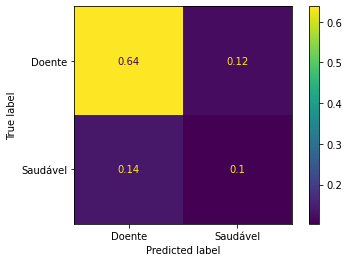

In [27]:
cm = confusion_matrix(Y_teste, y_predict, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Doente','Saudável'])
cmd.plot()